## Using Machine Learning to Predict House Prices in Washington State
by Hanna Seyoum

## IV. Milestone Report

## Problem Statement

House prices generally tend to go up with time, with some probability of crashing. With price increase, or decrease, many families (either looking to buy or sell)  are affected. The goal is to predict current values of the houses so that buyers and sellers can make informed decisions.

## The Data

The data contains houses from the state of Washington with 18 attributes such as number of bedrooms and bathrooms, square footage of d/t parts of house, house location, etc. The dataset was acquired from Kaggle.

## Methodology

I have treated this as a supervised learning regression problem.

* Acquired dataset from Kaggle  
* Applied data wrangling & cleaning for feautre engineering and selection, and to handle missing values and outliers 
* Exploratory Data Analysis and Visualizations to find patterns and insights w.r.t various features in housing data  
* Hypothesis testing leveraging inferential statistics  
* Predictive modeling for house prices leveraging linear regression, ridge regression, and random forest regression. 

### Libraries

pandas for:  
    
    data loading, wrangling, cleaning, and manipulation  
    feature selection and engineering  
    descriptive statistics


numpy for:

    generate an array of values
    array sorting and manipulation
    

matplotlib and seaborn for:

    data visualization
    

scikit-learn for:

    data preprocessing
    regression and ensemble models
    cross-validation
    model selection
    model performance / metrics

### Data Wrangling & Cleaning

The data is a CSV file which I uploaded onto pandas as a data frame. A combination of feature engineering and selection was used. There were no NaNs, but instead there were 0s that indicated missing values in some entries.

#### Cleaning steps

* Used a combination of **feature engineering** & **feature selection**. The more the features the better, to a certain extent (i.e., curse of dimensionality), therefore I kept all features except for `statezip` which I deleted after splitting it into `state` and `zipcode` features. 

* Created a `month` feature by extracting the months from the `date` column to factor in how price is affected over time.

* Created a `total_sqft` feature by summing `sqft_living` and `sqft_lot`.

* Changed the data types of `waterfront` & `condition` features from `int` to `category` because they both have values `0` & `1` where 1 means yes & 0 means no.

* Split `statezip` feature into two features, `state` & `zipcode` and deleted the `statezip` after split.


#### Handling missing/zero values

* Found 2 houses with 0 bedrooms & 0 bathrooms that were priced over \$1 million. It was clear that they were erroneous data. Therefore I replaced the bedroom & bathroom values of both houses with the mean bedroom & bathroom values.

* `yr_renovated` is a numeric feature with years of when the houses were last renovated, & 59.5\% of the entries have 0s as their value. I was not sure if the 0 meant that a house was never renovated, or if the renovation date was missing. I considered removing the column since 59.5\% of the entries are 0s, but instead of deleting the feature, I added a boolean array column with 1s for all the houses that have a 0, and 0s for all the houses that have a renovation year listed.

* 1.1\% of the `price` column has houses with 0 values. It is unlikely that the houses were worth \$0, so I did the same as with the `yr_renovated` feature and added a boolean array column. I also created a new dataframe with these houses removed to compare it's models to the ones with \$0 house price included. There was a slight improvement in the models with the 0s removed. However, I don't think this improvement in model performance is worth removing 1.1\% of the data.

#### Outliers

* Found two 3-bedroom houses with prices over \$10 million. To check if they were outliers or possibly erroneous, I plotted a linear regression line of the `price` column & `sqft_living` column to check if the prices are high because of their square footage.

Result: They seem to be erroneous entries, so I created a new dataframe with both houses removed and compared it's model performance with the original dataframe's model. There was significant improvement in model performance. Therefore I've conducted remaining analysis with the dataframe exlcuding these 2 houses.

### Exploratory Data Analysis & Statistical Analysis Plots

#### Feature Observation

Some assumptions:

    Houses with more bedrooms will be worth more
    Houses with more bathrooms will be worth more
    Houses in bad condition will be worth less
    Houses with higher total square footage will be worth more
    Houses with a waterfront will be worth more
    Houses sold most recently will be slightly more expensive than houses sold earlier.

* Plotted a heatmap of all the features and target variable to get an idea of their relationships.
* Plotted scatter plots of `price` against # of bedrooms, house size, and house condition. These plots showed a positive linear relationship between `sqft_living` & `price`, a non linear (polynomial) relationship between `bedrooms` & `price`, and the `condition` plot showed that houses in poor condition are worth much less than houses in moderate and good condition. Also, majority of the houses are in moderate condition, and the plot has a slightly parabolic shape.
* Plotted a barplot of `waterfront` vs `price` which showed that houses with waterfronts are worth more.
* Plotted a line plot of `yr_built` and `price`. This plot shows that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value. 
* Plot of mean & median prices per bedrooms. Noticed a slight difference between the two plots, with mean prices being slightly larger than median prices. This could be due to some price outliers.
* Plot of mean & median house sizes per number of bedrooms. We see a strong positive linear relationship between `bedrooms` and `price`, and the mean & median plots are very similar.
* An ecdf plot of house prices by each month (may, june, & july) shows that house prices remained about the same in each month.

#### Feature Importance

The heatmap gives us a visual representation of the features correlation with each other and with the target variable `price`. In addition to the heatmap, I wrote a function that calculates the importance of each feature in regards to its predictability of the target variable, i.e., the relationship of each feature with the target variable.

## Code

In [40]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [41]:
# Load the Washington housing dataset
df1 = pd.read_csv('house_price_prediction.csv')
print("The Washington housing dataset has {} data points with {} variables each.".format(*df1.shape))
df1.head(3)

The Washington housing dataset has 4600 data points with 18 variables each.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


## EDA and Summary Statistics

In [42]:
# inspecting structure of dataframe & number of null values (if any)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [43]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Notice `price`, `bedrooms`, & `bathroom` have a minimum value of 0. Needs further investigation.

In [44]:
df2 = df1.copy()

# change date col to datetime
df2['date'] = pd.to_datetime(df2['date'])

# change data types of 'waterfront' & 'condition' to categorical
df2[['waterfront', 'condition']] = df1[['waterfront', 'condition']].astype('category')

# splittig statezip into state & zipcode features & removing statezip
df2['state'] = df2['statezip'].apply(lambda x: x.split(' ')[0])
df2['zipcode'] = df2['statezip'].apply(lambda x: int(x.split(' ')[1]))
df2 = df2.drop('statezip', axis='columns')

# creating total_sqft feature: sqft_above + sqft_lot
df2['total_sqft'] = df2.sqft_living + df2.sqft_lot

# creating month feature
df2['month'] = pd.DatetimeIndex(df2['date']).month

## Some statistics

In [45]:
# Minimum price of the data
minimum_price = round(np.amin(df2["price"]), 2)

# Maximum price of the data
maximum_price = round(np.amax(df2["price"]), 2)

# Mean price of the data
mean_price = round(np.mean(df2["price"]), 2)

# Median price of the data
median_price = round(np.median(df2["price"]), 2)

# Standard deviation of prices of the data
std_price = round(np.std(df2["price"]), 2)

# Show the calculated statistics
print("Statistics for Washington housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Washington housing dataset:

Minimum price: $0.0
Maximum price: $26590000.0
Mean price: $551962.99
Median price $460943.46
Standard deviation of prices: $563773.41


## Feature Observation

Confirm `sqft_living` is `sqft_above` + `sqft_basement`

In [46]:
# Notice sqft_above & sqft_basement add up to sqft_living.
(df2.sqft_living == df2.sqft_above + df2.sqft_basement).all()

True

## Missing/zero values & outliers

### Outliers

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

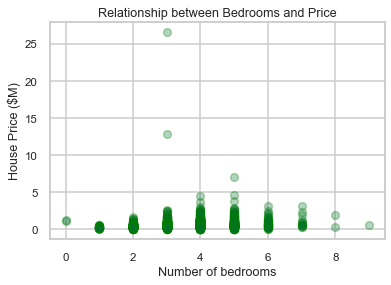

In [47]:
# Price
df3 = df2.copy()

plt.scatter(df3["bedrooms"], df3["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price")

Notice 2 outliers priced around \\$13 M & \\$26 M, both with 3 bedrooms.

Text(0.5, 1.0, 'Relationship between Bedrooms and Price')

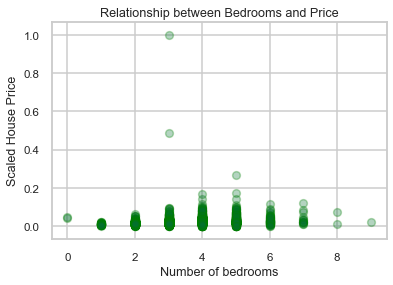

In [48]:
# normalized / scaled scatter plot of bedrooms vs price
X = df3["price"].values.reshape(-1,1)
X = MinMaxScaler().fit_transform(X)
plt.scatter(df3["bedrooms"], X, s=60, alpha=0.3, edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("Scaled House Price")
plt.title("Relationship between Bedrooms and Price")

The 2 house prices remain as outliers even after scaling.

In [49]:
df3[df3.price > 10000000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,country,state,zipcode,total_sqft,month
4346,2014-06-23,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,...,640,1956,2001,5426 40th Ave W,Seattle,USA,WA,98199,13584,6
4350,2014-07-03,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,0,1992,0,12005 SE 219th Ct,Kent,USA,WA,98031,8973,7


House price of greater than $10 milion might be too high for a 3 bedroom house. Do they have higher square footage than the other houses?

Text(0.5, 1.0, 'House Size vs Price')

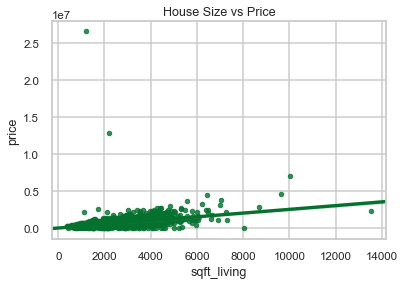

In [50]:
sns.regplot(data=df3, x='sqft_living', y='price', fit_reg=True, scatter_kws={'s':20})
plt.title("House Size vs Price")

Text(0.5, 1.0, 'Relationship between Bedrooms and Price (Without Outliers)')

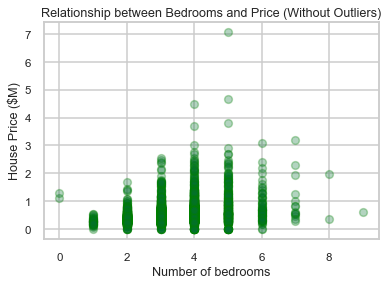

In [51]:
# removing price outliers
df_no_outs = df3[df3.price < 10000000].copy()

# plot with removed price outliers
plt.scatter(df_no_outs["bedrooms"], np.divide(df_no_outs["price"], 1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("Number of bedrooms")
plt.ylabel("House Price ($M)")
plt.title("Relationship between Bedrooms and Price (Without Outliers)")

A parabolic transformation on the `bedrooms` feature when modelling might be a better fit since the scatter plot follows a parabolic shape.

### Zero Values

In [52]:
# counting the number of zero values in each column
df3.isin([0]).sum()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
country             0
state               0
zipcode             0
total_sqft          0
month               0
dtype: int64

Notice: `waterfront` & `view` have categorical values of 0 & 1.  
Nearly half of `yr_renovated` are 0.  
Inspect the 0s in `bedrooms` & `bathrooms`

In [53]:
# 0 Price
price_zero_len = round((len(df3[df3.price == 0])/len(df3)) * 100, 1)
print('There are {} houses worth $0, which are {}% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.'.format(len(df3[df3.price == 0]), price_zero_len))
print('')

df3['price_is_zero'] = (df3['price'] == 0).astype(int)

There are 49 houses worth $0, which are 1.1% of entire data. Therefore created a column of boolean arrays with 1s for when price is $0 & 0s for when price is not $0.



In [54]:
# creating a new dataframe with $0 prices removed to compare later
df_no_zeros = df_no_outs[df_no_outs["price"] != 0].copy()

In [55]:
# 0 yr_renovated
# percentage of 'yr_renovated' col with 0 entries
yr_renov_0 = round((len(df3[df3['yr_renovated'] == 0]) / len(df3)) * 100, 1)
print("{}% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.".format(yr_renov_0))

df3['renov_date_is_zero'] = (df3['yr_renovated'] == 0).astype(int)

59.5% of yr_renovated column has 0 values, therefore added a column of boolean arrays with 1s for when yr_renov is 0 & 0s for others.


In [56]:
# 0 bedrooms & bathrooms
df3[df3.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,country,state,zipcode,total_sqft,month,price_is_zero,renov_date_is_zero
2365,2014-06-12,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,...,2009,814 E Howe St,Seattle,USA,WA,98102,7828,6,0,0
3209,2014-06-24,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,...,2009,20418 NE 64th Pl,Redmond,USA,WA,98053,32818,6,0,0


There are 2 houses with 0s as their bedrooms & bathrooms shown above.  
We can see that the houses are both worth over 1 mil, therefore the 0s must be errors.  
Will replace 0s with the mean bedroom & bathroom values of 3 & 2 respectively.

In [57]:
df3["bedrooms"].replace({0: round(df3["bedrooms"].mean(), 0)}, inplace=True)
df3["bathrooms"].replace({0: round(df3["bathrooms"].mean(), 0)}, inplace=True)

# Data Visualization

In [58]:
# again
df_no_outs = df_no_outs = df3[df3.price < 10000000]
df_no_zeros = df_no_zeros = df_no_outs[df_no_outs["price"] != 0]

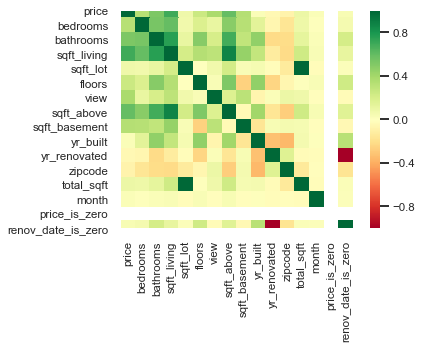

In [59]:
sns.heatmap(df_no_zeros.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1)

Inferences from the above heatmap:

   * `price` highly positively correlated with `sqft_living`, `sqft_above`, `bathrooms`, and `bedrooms`.
   * `sqft_living` has positive correlation with `bathrooms` and `bedrooms`.
   * `sqft_living` and `sqft_above`'s correlation is not surprising, since the latter is included in the former. They also both have a positive correlation with `bedrooms` and `bathrooms`.
   * `yr_built` and `bathrooms` have a positive correlation, meaning newer houses have more bathrooms. Also, newer houses tend to have more floors.

Text(0.5, 1.0, 'Barplot of Waterfront vs Price')

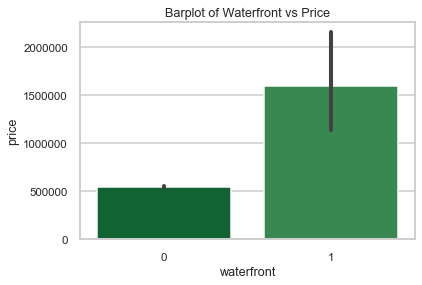

In [60]:
sns.barplot(x=df_no_zeros.waterfront, y=df_no_zeros.price)
plt.title("Barplot of Waterfront vs Price")

The above plot confirms that houses with waterfronts are priced higher than houses without.

Text(0.5, 1.0, 'House Condition vs Price')

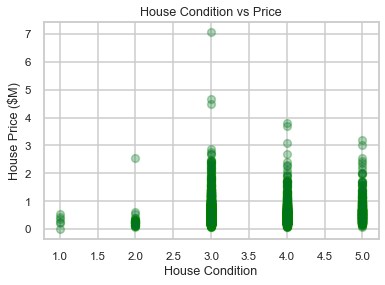

In [61]:
plt.scatter(df_no_zeros["condition"], df_no_zeros["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("House Condition")
plt.ylabel("House Price ($M)")
#plt.ylim((0, 5))
plt.title("House Condition vs Price")

As expected, the above plot shows that houses in poor condition are priced much lower than houses in better condition. It also shows that majority of the houses are in moderate condition (level 3). Follows a slightly parabolic shape.

(0, 5)

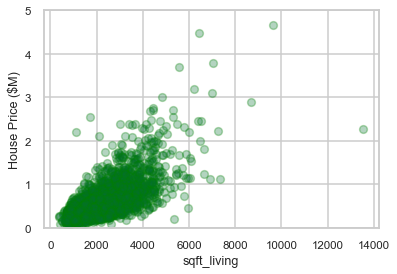

In [62]:
plt.scatter(df_no_zeros["sqft_living"], df_no_zeros["price"].div(1000000), alpha = 0.3 ,s=60 , edgecolors='g')
plt.xlabel("sqft_living")
plt.ylabel("House Price ($M)")
plt.ylim((0, 5))

We can see clearly that houses with higher square footages are worth more.

Text(0.5, 1.0, 'Lineplot of Year Built vs Price')

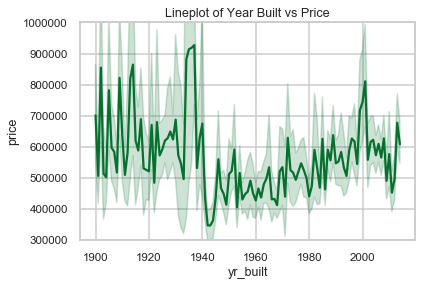

In [63]:
sns.lineplot(df_no_zeros.yr_built, df_no_zeros.price)
plt.ylim(300000,1000000)
plt.title("Lineplot of Year Built vs Price")

In the above plot we can see that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value.

### Scatterplot matrix & heatmap to visualize the pairwise relationships & correlations between features

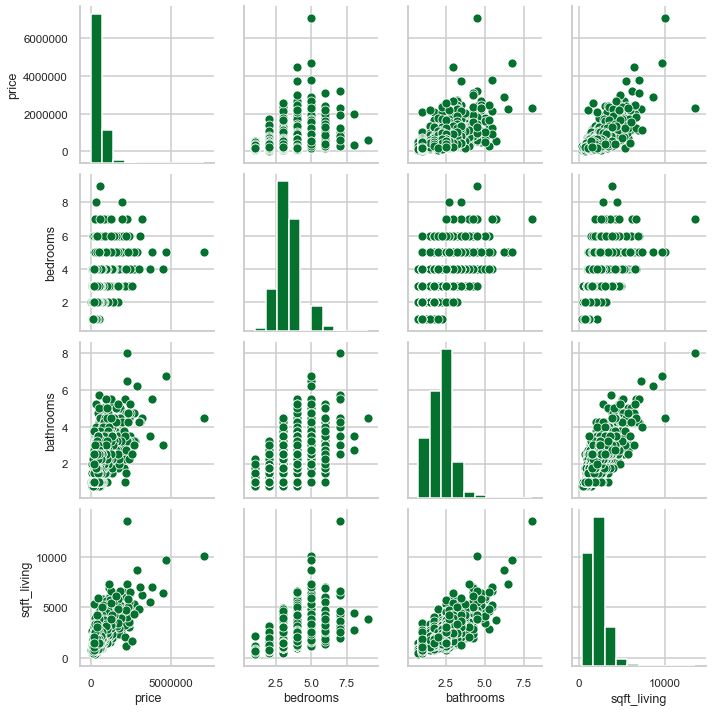

In [64]:
features = df_no_zeros[['price', 'bedrooms', 'bathrooms', 'sqft_living']]

sns.pairplot(features, height=2.5)
plt.tight_layout()

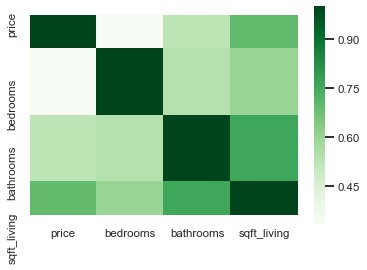

In [65]:
sns.heatmap(features.corr(), square=True, cmap='Greens')

## Statistical Data Analysis

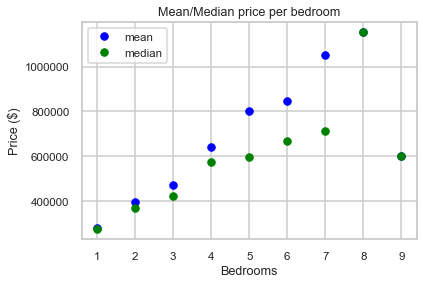

In [66]:
meanprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].mean()
medianprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].median()

plt.plot(meanprice_bedrooms, marker='.', linestyle='none', markersize='15', c='b', label='mean')
plt.plot(medianprice_bedrooms, marker='.', linestyle='none', markersize='15', c='g', label='median')
plt.title("Mean/Median price per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("Price ($)")
plt.legend()

Notice the price drop at 9 bedrooms. This could be due to limited 9 bedroom data. Beides that, `bedrooms` & `price` have a linear relationship.

Notice also that mean price is slightly larger than median price. This could be due to outliers affecting the mean.

In [67]:
corr, _  = pearsonr(df_no_zeros['bedrooms'], df_no_zeros['price'])
corr

0.3356221263233171

The correlation between `bedrooms` and `price` seems quite low, but correlation between `bedrooms` & mean `price` would probably be higher.

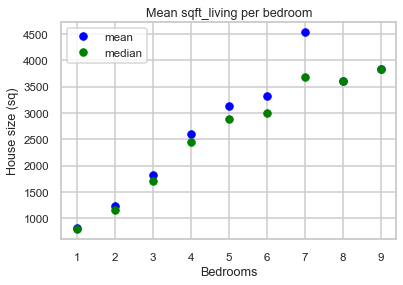

In [68]:
meansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].mean()
mediansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].median()

plt.plot(meansqft_bedroom, marker='.', linestyle='none', markersize='15', label='mean', c='b')
plt.plot(mediansqft_bedroom, marker='.', linestyle='none', markersize='15', label='median', c='g')
plt.title("Mean sqft_living per bedroom")
plt.xlabel("Bedrooms")
plt.ylabel("House size (sq)")
plt.legend()

Here, `bedrooms` and mean `sqft_living` have a strong positive linear relationship. The mean and median prices are very similar.

In [69]:
corr, _  = pearsonr(df_no_zeros['bedrooms'], df_no_zeros['sqft_living'])
corr

0.600643430410127

In [70]:
corr, _  = pearsonr(df_no_zeros['bathrooms'], df_no_zeros['yr_built'])
corr

0.46588664463314755

`bathrooms` & `yr_built` have a moderate positive correlation. This means newer houses are built with more bathrooms.

### ecdf plots of house price by month (to see if there's any shift)

In [71]:
df_no_zeros.month.unique()

array([5, 6, 7])

In [72]:
may_price = df_no_zeros[df_no_zeros.month==5]['price']
june_price = df_no_zeros[df_no_zeros.month==6]['price']
july_price = df_no_zeros[df_no_zeros.month==7]['price']

In [73]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

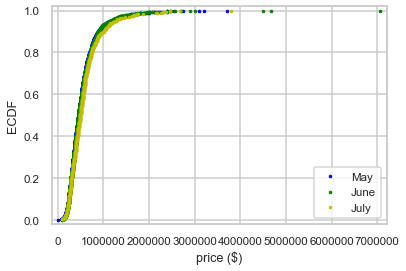

In [74]:
# Compute ECDFs
x_5, y_5 = ecdf(may_price)
x_6, y_6 = ecdf(june_price)
x_7, y_7 = ecdf(july_price)

# Plot the ECDFs
_ = plt.plot(x_5, y_5, marker='.', linestyle='none', markersize=5, c='b')
_ = plt.plot(x_6, y_6, marker='.', linestyle='none', markersize=5, c='g')
_ = plt.plot(x_7, y_7, marker='.', linestyle='none', markersize=5, c='y')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('price ($)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('May', 'June', 'July'), loc='lower right')

# Show the plot
plt.show()

In [75]:
df_no_outs.month.value_counts()

6    2178
5    1768
7     652
Name: month, dtype: int64

There were significantly more houses sold in june than in July, but the house prices on average remained about the same.

In [76]:
corr, _  = pearsonr(df_no_zeros['month'], df_no_zeros['price'])
corr

0.031235522731229506

### Feature Importance

In [77]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def feature_importance(X, y, model='reg'):
    score_func = {'reg': f_regression}

    # Score each of the features
    bestfeatures = SelectKBest(score_func=score_func[model], k='all')
    fit = bestfeatures.fit(X, y)

    # Organize and return the scores
    featureScores = pd.DataFrame([X.columns, fit.scores_]).T
    featureScores.columns = ['Feature', 'Score']
    return featureScores.sort_values('Score', ascending=False).set_index('Feature') 

In [78]:
X = df_no_zeros.drop(['price', 'date', 'street', 'city', 'state', 'country'], axis='columns')
y = pd.DataFrame(df_no_zeros['price'].values.reshape(-1,1))

In [80]:
feature_importance(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
//anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Score
Feature,
sqft_living,4308.62
sqft_above,2520.3
bathrooms,1732.41
view,760.948
sqft_basement,589.633
bedrooms,577.201
floors,318.472
waterfront,258.101
total_sqft,46.2453


We can see that `sqft_living` has the highest correlation with `price`, with `sqft_above`, and `bathrooms` following. 
It's interesting that the `condition` of the house has a small effect on the price.